In [26]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD  
from keras.preprocessing import image
from google.colab import drive

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [27]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [28]:
## Each image is a 32 x 32 x 3 numpy array
x_train[400].shape

(32, 32, 3)

[2]


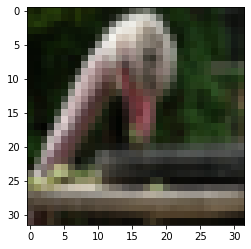

In [29]:
## Let's look at one of the images

print(y_train[400])
plt.imshow(x_train[400]);

In [30]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[400]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [33]:
# Build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_9 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [34]:
#learning rate
lrate = 0.01 
#decay of learning rate over time. decay = learning_rate / no_of_epochs
decay = lrate/100 
#stochastic gradient descent optimization algorithm for learning the parameters
sgd = SGD(lr=lrate, momentum=0.9, decay = decay, nesterov=False) 
#compile model using categorical cross-entropy loss function
model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Epoch 1/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4497 - accuracy: 0.4764 - val_loss: 1.3009 - val_accuracy: 0.5268
Epoch 2/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3749 - accuracy: 0.5076 - val_loss: 1.2705 - val_accuracy: 0.5448
Epoch 3/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3251 - accuracy: 0.5252 - val_loss: 1.2033 - val_accuracy: 0.5706
Epoch 4/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2859 - accuracy: 0.5400 - val_loss: 1.2091 - val_accuracy: 0.5694
Epoch 5/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2494 - accuracy: 0.5537 - val_loss: 1.1505 - val_accuracy: 0.5906
Epoch 6/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2175 - accuracy: 0.5654 - val_loss: 1.1370 - val_accuracy: 0.5973
Epoch 7/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1900 - accuracy: 0.5781 - val_loss: 1

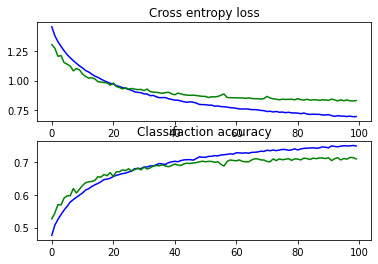

In [36]:
# Training the CNN model with cifar-10 dataset
history = model_1.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
_, acc = model_1.evaluate(x_test, y_test)
print('Accuracy  = %.3f' %(acc*100.0))
# model is saved 
model_1.save('project_model.h5')

# Analyze the loss and accuracy for training and validation data using history module
plt.subplot(211)
plt.title('Cross entropy loss')
plt.plot(history.history['loss'], color = 'blue', label = 'training data')
plt.plot(history.history['val_loss'], color = 'green', label = 'test data')
    
plt.subplot(212)
plt.title('Classifaction accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label = 'training data')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'test data')

In [37]:
#import images from google drive
drive.mount('/content/drive')
#Load the previously saved model
model = load_model('project_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class no:  [2]
Bird


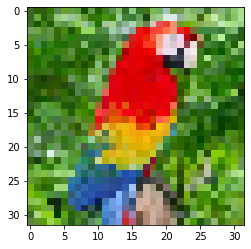

In [40]:
# an image is loaded and shrunk to 32x32 size, i.e same size as the training image data
test_image1 =image.load_img('/content/drive/My Drive/Colab Notebooks/Images/photo5.jpeg',target_size =(32,32))
#image type is PIL, which stands for Python Image Library.


# image is converted to numpy array as the model is trained on  numpy array object and it can recognize numbers only.
test_image =image.img_to_array(test_image1) 

# image is reshaped according to input shape of 4D tensor (batch, rows, columns,channels )
test_image = test_image.reshape(1,32,32,3)

# normalizing the image like the training data
test_image = test_image.astype('float32')
test_image = test_image / 255.0

# predicting the class in which the given image belongs
result = model.predict_classes(test_image) 

#display the image
plt.imshow(test_image1)
print('Class no: ',result)

#display name of the class according to class number
if result==0:
  print('Aeroplane')
elif result==1:
  print('Automobile')
elif result==2:
  print('Bird')
elif result==3:
  print('Cat')
elif result==4:
  print('Deer')
elif result==5:
  print('Dog')
elif result==6:
  print('Frog')
elif result==7:
  print('Horse')
elif result==8:
  print('Ship')
elif result==9:
  print('Truck')